In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nptdms
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nptdms: filename=npTDMS-1.7.1-py3-none-any.whl size=104706 sha256=f0ba0501974fb3636e409433ee28ecf0cb3ef9339c36bc364332a5d7a8afa413
  Stored in directory: /root/.cache/pip/wheels/b9/89/0c/a24d431db71199dab9edf2f2d08fb52028acb953191abfdec9
Successfully built nptdms


In [3]:
import re
import numpy as np
import pandas as pd
from nptdms import TdmsFile
import librosa
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
class PreProcess:
    def __init__(self):
        pass

    def data_loader(self, path):
        self.tdms_file = TdmsFile(path)

    def peak_normalization(self):

        L = list(name for name in self.tdms_file['RawData'].channels())
        L_str = list(map(str, L))
        data_lst = []
        peak_lst = []
        for string in L_str:
            num = re.sub(r'[^0-9]', '', string)
            if num:
                selected_data = self.tdms_file['RawData'][f'Channel{num}']
                data_lst.append(selected_data.data)
                peak_lst.append(max(abs(selected_data.data)))
        data_sum = sum(data_lst)
        peakAmp = max(abs(data_sum))
        maxPeak = max(peak_lst)

        self.y = (data_sum / peakAmp) * maxPeak

        return self.y

    def get_mfcc(self, sr=25600, n_mfcc=100, n_fft=640, hop_length=256, length = 6700):
        mfcc = librosa.feature.mfcc(y=self.y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = preprocessing.scale(mfcc, axis=1)
        pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
        padded_mfcc = pad2d(mfcc, length)
        return padded_mfcc

    def get_stft(self):
        x = self.y
        stft = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

        magnitude = np.abs(stft)
        log_spectrogram = librosa.amplitude_to_db(magnitude)
        return log_spectrogram

    def get_sc(self):
        cent = librosa.feature.spectral_centroid(y=self.y, sr=25600)
        return cent


In [ ]:
pp = PreProcess()

In [ ]:
pp.data_loader('/content/drive/MyDrive/DATAON_project/data set/train tdms/221102_수소열차/S206/Test_01.tdms')

In [ ]:
y = pp.peak_normalization()

In [ ]:
padded_mfcc = pp.get_mfcc()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
padded_mfcc

array([[-0.760772  , -0.7347826 , -0.81366175, ..., -0.41784227,
        -0.43510836, -0.28210104],
       [-0.8936769 , -0.8509037 , -0.9483327 , ..., -0.39361438,
        -0.43432477, -0.21710683],
       [-0.53105265, -0.4026529 , -0.39656582, ...,  0.3662361 ,
         0.15555148,  0.4405576 ],
       ...,
       [ 0.5416307 ,  0.11012314,  0.5548311 , ..., -0.74267   ,
         0.15848923, -1.2632838 ],
       [ 0.6154082 ,  0.20374833,  0.45174164, ..., -0.144015  ,
        -0.40334243, -1.2145195 ],
       [ 0.70370966,  0.4758708 ,  0.3050752 , ...,  0.28074598,
        -0.43758315, -0.8371847 ]], dtype=float32)

In [ ]:
print(y)

[-0.03311621 -0.03462149 -0.03462149 ...  0.05539439  0.05238382
  0.04877114]


In [ ]:
y_cut = []

In [ ]:
for i in y:
  if i >= 0.3:
    y_cut.append(i)
  else:
    continue

In [ ]:
'/content/drive/MyDrive/DATAON_project/data set/train tdms/221102_수소열차/S206/'

ls: cannot access 'content/drive/MyDrive/DATAON_project/data': No such file or directory
ls: cannot access 'set/train': No such file or directory
ls: cannot access 'tdms/221102_수소열차/S206/': No such file or directory


In [5]:
import os

In [6]:
files_lst = []
for (path, dir, files) in os.walk("/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/"):
    for filename in files:
        if 'test' in filename:
            files_lst.append(path + filename)

In [7]:
files_lst

['/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_2.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_3.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_4.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_5.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_6.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_7.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_8.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_9.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_10.tdms',
 '/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_11.tdms']

In [8]:
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display as dsp
from IPython.display import Audio

In [9]:
pp = PreProcess()

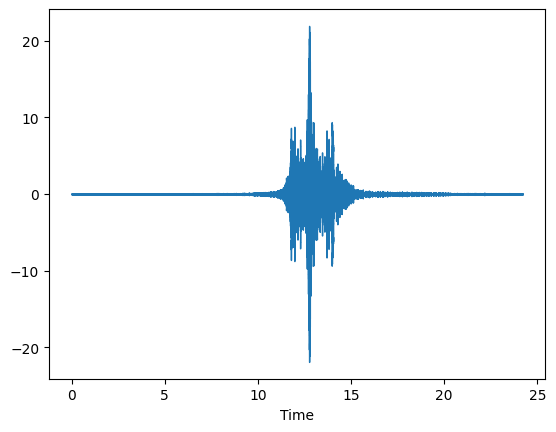

In [10]:
pp.data_loader(files_lst[0])
y = pp.peak_normalization()
sample_rate = 25600
dsp.waveshow(y,sr=sample_rate)
plt.show()
Audio(data=y,rate=sample_rate) #소리 재생

In [16]:
y[281600:281700]

array([ 0.12405401,  0.11581806,  0.10320675,  0.08158738,  0.05559267,
        0.02599472, -0.00669171, -0.04092238, -0.07052033, -0.09291182,
       -0.11478856, -0.1366653 , -0.14876185, -0.1580273 , -0.16291739,
       -0.16420427, -0.16626325, -0.16291739, -0.15699781, -0.15519619,
       -0.15210772, -0.14541599, -0.13357683, -0.11684755, -0.09831666,
       -0.07309406, -0.04401086, -0.0126113 ,  0.01492766,  0.03886339,
        0.0581664 ,  0.07052033,  0.0756678 ,  0.07412355,  0.07000558,
        0.06408599,  0.05379105,  0.03654703,  0.02058988, -0.00102949,
       -0.02496523, -0.04787146, -0.07026295, -0.09831666, -0.12328189,
       -0.14515863, -0.16523376, -0.1755287 , -0.1832499 , -0.1850515 ,
       -0.1793893 , -0.17218286, -0.16111578, -0.14593075, -0.13203259,
       -0.11530331, -0.09085283, -0.05996801, -0.03165694, -0.00746383,
        0.01338342,  0.02728159,  0.02831108,  0.02264887,  0.01415554,
       -0.00025737, -0.01595715, -0.03371592, -0.04684197, -0.05

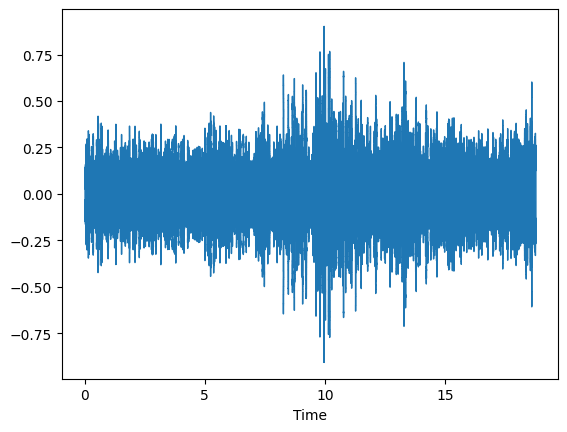

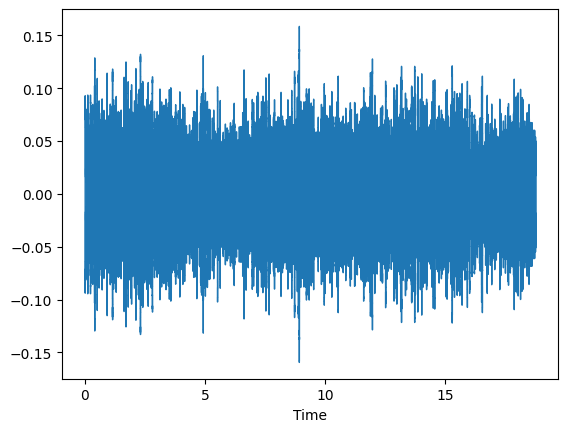

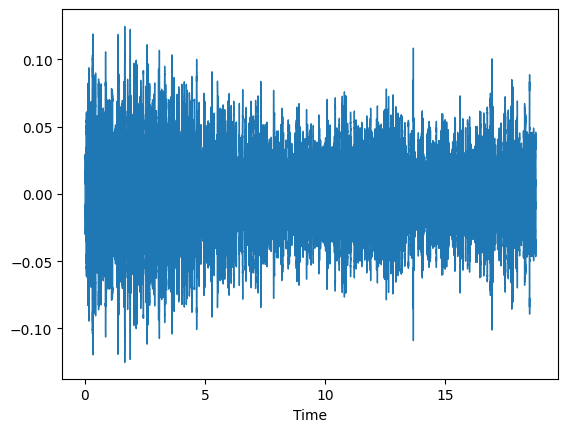

In [ ]:
for file in files_lst:
    pp.data_loader(file)
    y = pp.peak_normalization()
    sample_rate = 25600
    dsp.waveshow(y,sr=sample_rate)
    plt.show()
    Audio(data=y,rate=sample_rate) #소리 재생


In [ ]:
tdms_file = TdmsFile('/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_2.tdms')

In [ ]:
groups_data = tdms_file.groups()
print(groups_data)

[<TdmsGroup with path /'Configuration'>, <TdmsGroup with path /'Beampower'>, <TdmsGroup with path /'ImageData'>, <TdmsGroup with path /'RawData'>, <TdmsGroup with path /'LPData'>]


In [ ]:
channels_data = tdms_file['Beampower'].channels()
print(channels_data)

[<TdmsChannel with path /'Beampower'/'Beampower'>]


In [ ]:
selected_data = tdms_file['Beampower']['Beampower']

In [ ]:
len(selected_data.data)

726000

In [ ]:
import matplotlib.pyplot as pq

n = 1
for i in range(1200, 726000, 1200):
    print("frame :",n)
    k = selected_data.data[i:i+1200]
    k.resize((30,40))
    pq.imshow(k)
    pq.show()
    n +=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
1724416

In [ ]:
387072

In [ ]:
#load tdms_file
tdms_file = TdmsFile.read('/content/drive/MyDrive/DATAON_project/data set/train tdms/221102_수소열차/BATCAM2/test_01.tdms')
# show groups
groups_data = tdms_file.groups()
print(groups_data)

[<TdmsGroup with path /'Configuration'>, <TdmsGroup with path /'Beampower'>, <TdmsGroup with path /'ImageData'>, <TdmsGroup with path /'RawData'>]


In [ ]:
channels_data = tdms_file['RawData'].channels()
print(channels_data)

[<TdmsChannel with path /'RawData'/'Channel01'>, <TdmsChannel with path /'RawData'/'Channel04'>, <TdmsChannel with path /'RawData'/'Channel05'>, <TdmsChannel with path /'RawData'/'Channel08'>, <TdmsChannel with path /'RawData'/'Channel11'>, <TdmsChannel with path /'RawData'/'Channel12'>, <TdmsChannel with path /'RawData'/'Channel14'>, <TdmsChannel with path /'RawData'/'Channel16'>, <TdmsChannel with path /'RawData'/'Channel17'>, <TdmsChannel with path /'RawData'/'Channel23'>, <TdmsChannel with path /'RawData'/'Channel24'>, <TdmsChannel with path /'RawData'/'Channel34'>, <TdmsChannel with path /'RawData'/'Channel35'>, <TdmsChannel with path /'RawData'/'Channel36'>, <TdmsChannel with path /'RawData'/'Channel45'>, <TdmsChannel with path /'RawData'/'Channel46'>, <TdmsChannel with path /'RawData'/'Channel47'>, <TdmsChannel with path /'RawData'/'Channel48'>, <TdmsChannel with path /'RawData'/'Channel49'>, <TdmsChannel with path /'RawData'/'Channel52'>, <TdmsChannel with path /'RawData'/'Chan

In [ ]:
selected_data = tdms_file['RawData'][f'Channel01']
selected_data.data.shape

(6024960,)

In [ ]:
data_lst = []
peak_lst = []
for i in channels_data:
  num = str(i)[42:-2]
  selected_data = tdms_file['RawData'][f'Channel{num}']
  data_lst.append(selected_data.data)
  peak_lst.append(max(abs(selected_data.data)))

In [ ]:
# 단순 합
y = sum(data_lst)

In [ ]:
peakAmp = max(abs(y)) # simple sum y 중 최댓값

In [ ]:
maxPeak = max(peak_lst) # 전체 채널 중 최댓값

In [ ]:
y = (y/peakAmp)*maxPeak

In [ ]:
y

array([-0.03311621, -0.03462149, -0.03462149, ...,  0.05539439,
        0.05238382,  0.04877114], dtype=float32)

In [ ]:
# spectrogram으로 변환

In [ ]:
# mfcc 방식

In [ ]:
import librosa

from sklearn import preprocessing

In [ ]:
mfcc = librosa.feature.mfcc(y=y, sr=25600, n_mfcc=100, n_fft=640, hop_length=256)

In [ ]:
mfcc = preprocessing.scale(mfcc, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
?preprocessing.scale

In [ ]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = pad2d(mfcc, 6700)

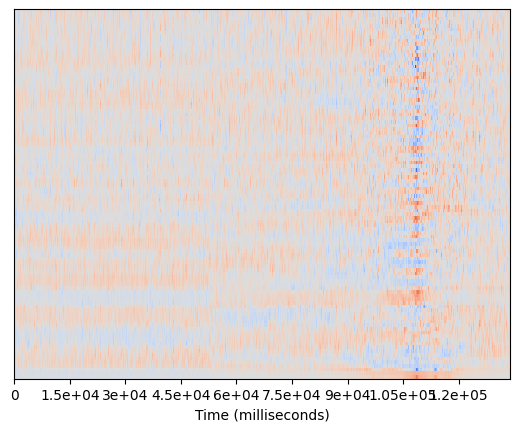

In [ ]:
librosa.display.specshow(padded_mfcc, sr=25600, x_axis='ms')

In [ ]:
padded_mfcc

array([[-0.760772  , -0.7347826 , -0.81366175, ..., -0.41784227,
        -0.43510836, -0.28210104],
       [-0.8936769 , -0.8509037 , -0.9483327 , ..., -0.39361438,
        -0.43432477, -0.21710683],
       [-0.53105265, -0.4026529 , -0.39656582, ...,  0.3662361 ,
         0.15555148,  0.4405576 ],
       ...,
       [ 0.5416307 ,  0.11012314,  0.5548311 , ..., -0.74267   ,
         0.15848923, -1.2632838 ],
       [ 0.6154082 ,  0.20374833,  0.45174164, ..., -0.144015  ,
        -0.40334243, -1.2145195 ],
       [ 0.70370966,  0.4758708 ,  0.3050752 , ...,  0.28074598,
        -0.43758315, -0.8371847 ]], dtype=float32)

In [ ]:
# stft 방식

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
x = y
stft = librosa.stft(x, n_fft=128, hop_length=64, win_length=128)

magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=25600, hop_length=256)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

NameError: ignored

In [ ]:
# 자르기 방식

In [ ]:
y

array([-0.03311621, -0.03462149, -0.03462149, ...,  0.05539439,
        0.05238382,  0.04877114], dtype=float32)

In [ ]:
y_cut = []

In [ ]:
for i in y:
  if i >= 0.3:
    y_cut.append(i)
  else:
    continue

In [ ]:
y_cut = np.array(y_cut)

In [ ]:
mfcc_cut = librosa.feature.mfcc(y=y_cut, sr=25600, n_mfcc=100, n_fft=640, hop_length=256)

In [ ]:
mfcc_cut = preprocessing.scale(mfcc_cut, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [ ]:
mfcc_cut.shape

(100, 366)

In [ ]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc_cut = pad2d(mfcc_cut, 336)

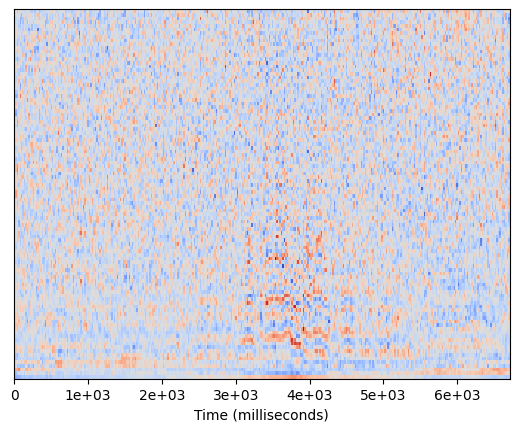

In [ ]:
librosa.display.specshow(padded_mfcc_cut, sr=25600, x_axis='ms')

In [ ]:
# 주파수

In [ ]:
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display as dsp
from IPython.display import Audio

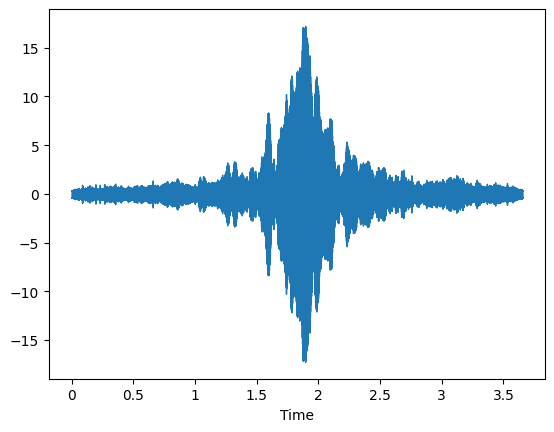

In [ ]:
sample_rate = 25600
dsp.waveshow(y_cut,sr=sample_rate)
plt.show()

Audio(data=y_cut,rate=sample_rate) #소리 재생

In [ ]:
y

array([-0.03311621, -0.03462149, -0.03462149, ...,  0.05539439,
        0.05238382,  0.04877114], dtype=float32)

In [ ]:
y[:30]

array([-0.03311621, -0.03462149, -0.03462149, -0.03642783, -0.03763206,
       -0.04034156, -0.04034156, -0.04154579, -0.04184685, -0.04365318,
       -0.04455635, -0.04395424, -0.04365318, -0.04124473, -0.03823417,
       -0.03582571, -0.0352236 , -0.03432043, -0.0325141 , -0.03130987,
       -0.03010564, -0.0304067 , -0.02920247, -0.02739614, -0.02799825,
       -0.02709508, -0.02528874, -0.02438557, -0.02378346, -0.0234824 ],
      dtype=float32)

In [ ]:
##

In [ ]:
#load tdms_file
tdms_file2 = TdmsFile.read('/content/drive/MyDrive/DATAON_project/data set/train tdms/221109_수소열차/S206/test_2.tdms')
# show groups
groups_data = tdms_file2.groups()
print(groups_data)

[<TdmsGroup with path /'Configuration'>, <TdmsGroup with path /'Beampower'>, <TdmsGroup with path /'ImageData'>, <TdmsGroup with path /'RawData'>, <TdmsGroup with path /'LPData'>]


In [ ]:
channels_data = tdms_file2['RawData'].channels()
print(channels_data)

[<TdmsChannel with path /'RawData'/'Channel01'>, <TdmsChannel with path /'RawData'/'Channel02'>, <TdmsChannel with path /'RawData'/'Channel03'>, <TdmsChannel with path /'RawData'/'Channel04'>, <TdmsChannel with path /'RawData'/'Channel05'>, <TdmsChannel with path /'RawData'/'Channel06'>, <TdmsChannel with path /'RawData'/'Channel07'>, <TdmsChannel with path /'RawData'/'Channel08'>, <TdmsChannel with path /'RawData'/'Channel09'>, <TdmsChannel with path /'RawData'/'Channel10'>, <TdmsChannel with path /'RawData'/'Channel11'>, <TdmsChannel with path /'RawData'/'Channel12'>, <TdmsChannel with path /'RawData'/'Channel13'>, <TdmsChannel with path /'RawData'/'Channel14'>, <TdmsChannel with path /'RawData'/'Channel15'>, <TdmsChannel with path /'RawData'/'Channel16'>, <TdmsChannel with path /'RawData'/'Channel17'>, <TdmsChannel with path /'RawData'/'Channel18'>, <TdmsChannel with path /'RawData'/'Channel19'>, <TdmsChannel with path /'RawData'/'Channel20'>, <TdmsChannel with path /'RawData'/'Chan

In [ ]:
data_lst = []
peak_lst = []
for i in channels_data:
  num = str(i)[42:-2]
  selected_data = tdms_file2['RawData'][f'Channel{num}']
  data_lst.append(selected_data.data)
  peak_lst.append(max(abs(selected_data.data)))

In [ ]:
y = sum(data_lst)

In [ ]:
peakAmp = max(abs(y)) # simple sum y 중 최댓값
maxPeak = max(peak_lst) # 전체 채널 중 최댓값

In [ ]:
y = (y/peakAmp)*maxPeak

In [ ]:
y

array([-0.01003756, -0.01080969, -0.01183918, ...,  0.02985532,
        0.02934057,  0.02831108], dtype=float32)

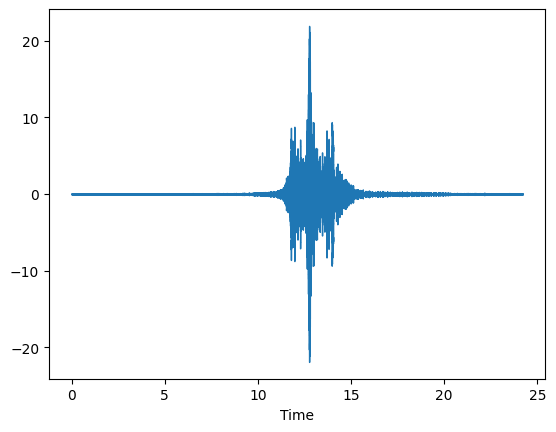

In [ ]:
sample_rate = 25600
dsp.waveshow(y,sr=sample_rate)
plt.show()

Audio(data=y,rate=sample_rate) #소리 재생

In [ ]:
len(y)

619520